## Azat Dovgeldiyev

# CSC 578 NN&DL Spring 2021
## HW6: Image Classification using a CNN



This code is slightly modified from the TensorFlow tutorial [Convolutional Neural Network (CNN)](https://www.tensorflow.org/tutorials/images/cnn) for the purpose of our homework. The code first downloads the data, the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) and partitions the training set into training and validation sets. Then the code builds a CNN network and trains the network with the training set. Finally the code evaluates the network performance using the validation set.

Note that there are **three places** in the code, indicated with **IMPORTANT**, where you have to choose the syntax that works for the version of TensorFlow (1 or 2) installed on your platform.

### Import Tensorflow
**IMPORTANT (1)**
Uncomment either import line(s) for the version of TensorFlow (TF1 or TF2) of your platform.

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)  # check the TF version!

2.2.0


In [2]:
# For TF version 2 (just one line)
from tensorflow.keras import datasets, layers, models

# For TF version 1 (need both lines)
# from tensorflow import keras
# from keras import datasets, layers, models

### Download and prepare the CIFAR10 dataset¶

The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is (pre-)divided into 50,000 training images and 10,000 testing images.


In [3]:
# Download the data from the repository site.
(train_all_images, train_all_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 8s 0us/step


In [4]:
# !! DO NOT REMOVE THIS LINE !!
# Delete test_labels (by making it an empty list) so that we don't accidentally
# use it in the code.
test_labels = []

# Then split the training set ('train_all') into two subsets: train and 
# validation.  After that, we have 3 subsets: train, validation and test.
from sklearn.model_selection import train_test_split

# 80% train, 20% validation, and by using stratefied sampling.  
train_images, valid_images, train_labels, valid_labels \
  = train_test_split(train_all_images, train_all_labels,
                     stratify=train_all_labels, test_size=0.2)


In [5]:
# Normalize pixel values of images to be between 0 and 1
train_images, valid_images, test_images \
  = train_images / 255.0, valid_images / 255.0, test_images / 255.0

In [6]:
train_labels

array([[9],
       [3],
       [2],
       ...,
       [1],
       [8],
       [1]], dtype=uint8)

In [7]:
valid_labels

array([[0],
       [6],
       [9],
       ...,
       [0],
       [9],
       [8]], dtype=uint8)

### Verify the data
To verify that the dataset looks correct, plot the first 10 images from the training set and display the class name below each image.

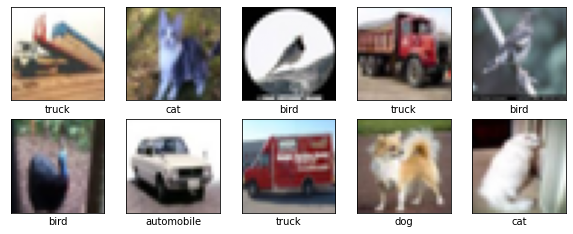

In [8]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Create a convolutional network
As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size, where color_channels refers to (R,G,B). The format of CIFAR images is 32 * 32 pixels, so the input shape is (32, 32, 3). The output layer has 10 nodes, corresponding to the number of categories of the images.

In this code, the activation function of the output layer is specified to be softmax for the purpose of aligning the two versions of TensorFlow (TF1 and TF2; in particular to make TF2 compatible with TF1's 'sparse_categorical_crossentropy' loss function).

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # As noted above

Verify the model

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

### Compile the model
**IMPORTANT (2)** Uncomment either loss function for the version of TensorFlow (TF1 or TF2) of your platform.

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              #loss='sparse_categorical_crossentropy', # For TF1
              metrics=['accuracy'])



### Train the model

In [12]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels))

Epoch 1/10
1250/1250 [==============================] - 22s 17ms/step - loss: 1.5893 - accuracy: 0.4198 - val_loss: 1.3004 - val_accuracy: 0.5383
Epoch 2/10
1250/1250 [==============================] - 23s 18ms/step - loss: 1.2332 - accuracy: 0.5630 - val_loss: 1.1337 - val_accuracy: 0.6010
Epoch 3/10
1250/1250 [==============================] - 24s 20ms/step - loss: 1.0733 - accuracy: 0.6220 - val_loss: 1.0520 - val_accuracy: 0.6336
Epoch 4/10
1250/1250 [==============================] - 24s 20ms/step - loss: 0.9714 - accuracy: 0.6583 - val_loss: 0.9987 - val_accuracy: 0.6473
Epoch 5/10
1250/1250 [==============================] - 24s 19ms/step - loss: 0.8873 - accuracy: 0.6877 - val_loss: 1.0172 - val_accuracy: 0.6444
Epoch 6/10
1250/1250 [==============================] - 25s 20ms/step - loss: 0.8318 - accuracy: 0.7099 - val_loss: 0.9814 - val_accuracy: 0.6650
Epoch 7/10
1250/1250 [==============================] - 25s 20ms/step - loss: 0.7773 - accuracy: 0.7265 - val_loss: 0.9136 -

### Evaluate the model
**IMPORTANT (3)** Uncomment either syntax for the version of TensorFlow (TF1 or TF2) of your platform.

313/313 - 2s - loss: 0.9471 - accuracy: 0.6871
valid_accuracy=0.6870999932289124, valid_loss=0.947136640548706


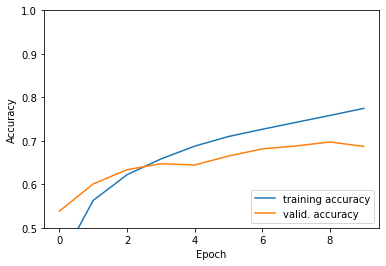

In [13]:
plt.plot(history.history['accuracy'], label='training accuracy') # For TF2
#plt.plot(history.history['acc'], label='training accuracy') # For TF1
plt.plot(history.history['val_accuracy'], label = 'valid. accuracy') # For TF2
#plt.plot(history.history['val_acc'], label = 'valid. accuracy') # For TF1
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Evaluate the learned model with validation set
valid_loss, valid_acc = model.evaluate(valid_images, valid_labels, verbose=2) 
print ("valid_accuracy=%s, valid_loss=%s" % (valid_acc, valid_loss))

### TO DO (by you): Make Predictions
Apply the learned network to **'test_images'** and generate predictions.

Look at the code from HW#4 or other tutorial code for the syntax. You should generate predictions and create/write a KAGGLE submission file.

#### Change the number of filters

In [90]:
#number of filters gradually increased from 32 to 128
model2 = models.Sequential()
model2.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (32,32,3)))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model2.add(layers.Flatten())
model2.add(layers.Dense(256, activation = 'relu'))
model2.add(layers.Dense(10, activation = 'softmax'))

In [91]:
model2.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_75 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten_17 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 256)             

In [92]:
model2.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),metrics =['accuracy'])

In [93]:
history2 = model2.fit(train_images, train_labels,epochs = 10,
                     validation_data = (valid_images, valid_labels))

Epoch 1/10
1250/1250 [==============================] - 26s 21ms/step - loss: 1.4897 - accuracy: 0.4578 - val_loss: 1.2351 - val_accuracy: 0.5603
Epoch 2/10
1250/1250 [==============================] - 28s 22ms/step - loss: 1.1038 - accuracy: 0.6095 - val_loss: 1.0318 - val_accuracy: 0.6341
Epoch 3/10
1250/1250 [==============================] - 28s 23ms/step - loss: 0.9232 - accuracy: 0.6766 - val_loss: 0.9220 - val_accuracy: 0.6762
Epoch 4/10
1250/1250 [==============================] - 28s 23ms/step - loss: 0.8104 - accuracy: 0.7149 - val_loss: 0.8893 - val_accuracy: 0.6913
Epoch 5/10
1250/1250 [==============================] - 29s 23ms/step - loss: 0.7058 - accuracy: 0.7521 - val_loss: 0.8757 - val_accuracy: 0.6987
Epoch 6/10
1250/1250 [==============================] - 34s 27ms/step - loss: 0.6179 - accuracy: 0.7808 - val_loss: 0.8568 - val_accuracy: 0.7108
Epoch 7/10
1250/1250 [==============================] - 37s 30ms/step - loss: 0.5300 - accuracy: 0.8120 - val_loss: 0.9155 -

313/313 - 2s - loss: 1.0989 - accuracy: 0.7059
valid_accuracy=0.7059000134468079, valid_loss=1.0988879203796387


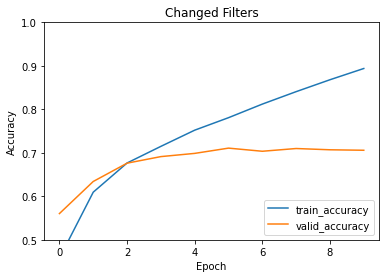

In [94]:
plt.plot(history2.history['accuracy'],label = 'train_accuracy')
plt.plot(history2.history['val_accuracy'],label = 'valid_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.title('Changed Filters')
plt.legend(loc = 'lower right')
# Evaluate the learned model with validation set
valid_loss, valid_acc = model2.evaluate(valid_images, valid_labels, verbose = 2)
print ("valid_accuracy=%s, valid_loss=%s" % (valid_acc, valid_loss))

#### Change the size of filters

In [95]:
# the height and width changed in the second convolutional network from 3 to 5
model3 = models.Sequential()
model3.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (32,32,3)))
model3.add(layers.MaxPooling2D((2,2)))
model3.add(layers.Conv2D(128,(5,5), activation = 'relu'))
model3.add(layers.MaxPooling2D((2,2)))
model3.add(layers.Flatten())
model3.add(layers.Dense(256, activation = 'relu'))
model3.add(layers.Dense(10, activation = 'softmax'))
model3.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_78 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 11, 11, 128)       102528    
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 3200)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 256)               819456    
_________________________________________________________________
dense_31 (Dense)             (None, 10)              

In [96]:
model3.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
              metrics = ['accuracy'])

In [97]:
history3=model3.fit(train_images, train_labels, epochs = 10,
                   validation_data=(valid_images, valid_labels))

Epoch 1/10
1250/1250 [==============================] - 39s 31ms/step - loss: 1.4725 - accuracy: 0.4663 - val_loss: 1.2675 - val_accuracy: 0.5604
Epoch 2/10
1250/1250 [==============================] - 43s 35ms/step - loss: 1.0988 - accuracy: 0.6135 - val_loss: 1.0367 - val_accuracy: 0.6319
Epoch 3/10
1250/1250 [==============================] - 44s 35ms/step - loss: 0.9298 - accuracy: 0.6732 - val_loss: 0.9797 - val_accuracy: 0.6582
Epoch 4/10
1250/1250 [==============================] - 45s 36ms/step - loss: 0.8020 - accuracy: 0.7200 - val_loss: 0.9366 - val_accuracy: 0.6824
Epoch 5/10
1250/1250 [==============================] - 44s 35ms/step - loss: 0.6889 - accuracy: 0.7582 - val_loss: 0.9217 - val_accuracy: 0.6885
Epoch 6/10
1250/1250 [==============================] - 54s 43ms/step - loss: 0.5889 - accuracy: 0.7915 - val_loss: 0.9601 - val_accuracy: 0.6826
Epoch 7/10
1250/1250 [==============================] - 54s 43ms/step - loss: 0.4946 - accuracy: 0.8253 - val_loss: 1.0058 -

313/313 - 3s - loss: 1.2767 - accuracy: 0.6805
valid_accuracy=0.6804999709129333, valid_loss=1.2766536474227905


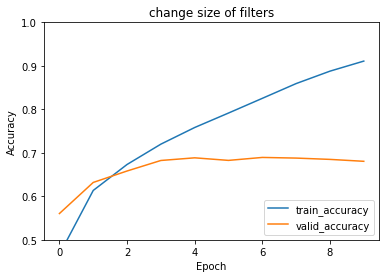

In [98]:
plt.plot(history3.history['accuracy'], label = 'train_accuracy')
plt.plot(history3.history['val_accuracy'], label = 'valid_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.title('change size of filters')
plt.legend(loc = 'lower right')

valid_loss, valid_acc = model3.evaluate(valid_images, valid_labels,verbose =2)
print ("valid_accuracy=%s, valid_loss=%s" % (valid_acc, valid_loss))

#### Change the size of stride

In [27]:
# setting stride to 2 (filter moves 2 pixels at a time)
model4 = models.Sequential()
model4.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32,32,3)))
model4.add(layers.MaxPooling2D((2,2), strides = 2))
model4.add(layers.Conv2D(256, (5,5), activation = 'relu'))
model4.add(layers.MaxPooling2D((2,2), strides = 2))
model4.add(layers.Flatten())
model4.add(layers.Dense(256,activation = 'relu'))
model4.add(layers.Dense(10, activation = 'softmax'))

model4.compile(optimizer = 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
              metrics = ['accuracy'])
model4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 256)       205056    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 256)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               1638656   
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

In [28]:
history4 = model4.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels)) 

Epoch 1/10
1250/1250 [==============================] - 60s 48ms/step - loss: 1.4598 - accuracy: 0.4699 - val_loss: 1.1888 - val_accuracy: 0.5743
Epoch 2/10
1250/1250 [==============================] - 68s 54ms/step - loss: 1.0758 - accuracy: 0.6222 - val_loss: 1.0255 - val_accuracy: 0.6366
Epoch 3/10
1250/1250 [==============================] - 86s 69ms/step - loss: 0.9053 - accuracy: 0.6847 - val_loss: 0.9483 - val_accuracy: 0.6755
Epoch 4/10
1250/1250 [==============================] - 78s 62ms/step - loss: 0.7841 - accuracy: 0.7255 - val_loss: 0.9575 - val_accuracy: 0.6725
Epoch 5/10
1250/1250 [==============================] - 81s 65ms/step - loss: 0.6750 - accuracy: 0.7640 - val_loss: 0.9270 - val_accuracy: 0.6957
Epoch 6/10
1250/1250 [==============================] - 65s 52ms/step - loss: 0.5835 - accuracy: 0.7962 - val_loss: 0.9272 - val_accuracy: 0.6988
Epoch 7/10
1250/1250 [==============================] - 83s 67ms/step - loss: 0.4939 - accuracy: 0.8265 - val_loss: 0.9574 -

313/313 - 4s - loss: 1.1775 - accuracy: 0.7003
valid_accuracy=0.7002999782562256, valid_loss=1.1774789094924927


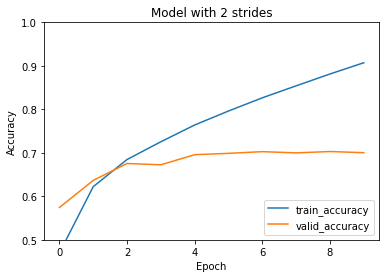

In [29]:
plt.plot(history4.history['accuracy'], label = 'train_accuracy')
plt.plot(history4.history['val_accuracy'], label = 'valid_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.title('Model with 2 strides')
plt.legend(loc = 'lower right')

valid_loss, valid_acc = model4.evaluate(valid_images, valid_labels,verbose =2)
print ("valid_accuracy=%s, valid_loss=%s" % (valid_acc, valid_loss))

### Add more convolutional layers

In [30]:
#4 covolutional layers and 2 pooling layers

model5 = models.Sequential()
model5.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (32, 32,3)))
model5.add(layers.Conv2D(32,(3,3), activation = 'relu'))
model5.add(layers.MaxPooling2D((2,2), strides = 2))
model5.add(layers.Conv2D(256,(5,5), activation = 'relu'))
model5.add(layers.Conv2D(256,(5,5), activation = 'relu'))
model5.add(layers.MaxPooling2D((2,2), strides = 2))
model5.add(layers.Flatten())
model5.add(layers.Dense(256, activation = 'relu'))
model5.add(layers.Dense(10, activation = 'softmax'))
model5.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics = ['accuracy'])
model5.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 10, 10, 256)       205056    
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 6, 6, 256)         1638656   
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 3, 3, 256)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 2304)             

In [31]:
history5 = model5.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels)) 

Epoch 1/10
1250/1250 [==============================] - 206s 165ms/step - loss: 1.5771 - accuracy: 0.4161 - val_loss: 1.2437 - val_accuracy: 0.5526
Epoch 2/10
1250/1250 [==============================] - 404s 323ms/step - loss: 1.1202 - accuracy: 0.6011 - val_loss: 0.9969 - val_accuracy: 0.6500
Epoch 3/10
1250/1250 [==============================] - 265s 212ms/step - loss: 0.9143 - accuracy: 0.6765 - val_loss: 0.9464 - val_accuracy: 0.6730
Epoch 4/10
1250/1250 [==============================] - 302s 241ms/step - loss: 0.7831 - accuracy: 0.7225 - val_loss: 0.9236 - val_accuracy: 0.6830
Epoch 5/10
1250/1250 [==============================] - 213s 170ms/step - loss: 0.6844 - accuracy: 0.7589 - val_loss: 0.8322 - val_accuracy: 0.7184
Epoch 6/10
1250/1250 [==============================] - 233s 187ms/step - loss: 0.5932 - accuracy: 0.7890 - val_loss: 0.8611 - val_accuracy: 0.7177
Epoch 7/10
1250/1250 [==============================] - 213s 170ms/step - loss: 0.5093 - accuracy: 0.8184 - val_

313/313 - 9s - loss: 1.1282 - accuracy: 0.7074
valid_accuracy=0.7074000239372253, valid_loss=1.1281898021697998


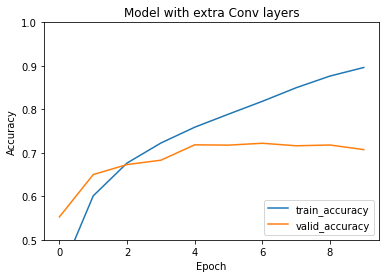

In [32]:
plt.plot(history5.history['accuracy'], label = 'train_accuracy')
plt.plot(history5.history['val_accuracy'], label = 'valid_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.title('Model with extra Conv layers')
plt.legend(loc = 'lower right')

valid_loss, valid_acc = model5.evaluate(valid_images, valid_labels,verbose =2)
print ("valid_accuracy=%s, valid_loss=%s" % (valid_acc, valid_loss))

### Add Dropout

In [33]:
# in addition to the previous model dropout value added. (Note: number of filters in Conv2D changed to 256)

model6 = models.Sequential()
model6.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (32, 32,3)))
model6.add(layers.Conv2D(32,(3,3), activation = 'relu'))
model6.add(layers.MaxPooling2D((2,2), strides = 2))
model6.add(layers.Dropout(0.5))
model6.add(layers.Conv2D(256,(5,5), activation = 'relu'))
model6.add(layers.Conv2D(256,(5,5), activation = 'relu'))
model6.add(layers.MaxPooling2D((2,2), strides = 2))
model6.add(layers.Flatten())
model6.add(layers.Dense(256, activation = 'relu'))
model6.add(layers.Dense(10, activation = 'softmax'))
model6.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics = ['accuracy'])
model6.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 10, 10, 256)       205056    
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 6, 6, 256)         1638656   
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 3, 3, 256)        

In [34]:
history6 = model6.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels)) 

Epoch 1/10
1250/1250 [==============================] - 209s 167ms/step - loss: 1.5706 - accuracy: 0.4155 - val_loss: 1.2523 - val_accuracy: 0.5430
Epoch 2/10
1250/1250 [==============================] - 414s 331ms/step - loss: 1.1704 - accuracy: 0.5791 - val_loss: 1.0189 - val_accuracy: 0.6396
Epoch 3/10
1250/1250 [==============================] - 452s 362ms/step - loss: 0.9922 - accuracy: 0.6476 - val_loss: 0.8929 - val_accuracy: 0.6874
Epoch 4/10
1250/1250 [==============================] - 500s 400ms/step - loss: 0.8799 - accuracy: 0.6903 - val_loss: 0.8733 - val_accuracy: 0.7015
Epoch 5/10
1250/1250 [==============================] - 215s 172ms/step - loss: 0.7962 - accuracy: 0.7192 - val_loss: 0.8080 - val_accuracy: 0.7193
Epoch 6/10
1250/1250 [==============================] - 516s 413ms/step - loss: 0.7312 - accuracy: 0.7419 - val_loss: 0.8187 - val_accuracy: 0.7191
Epoch 7/10
1250/1250 [==============================] - 566s 453ms/step - loss: 0.6793 - accuracy: 0.7601 - val_

313/313 - 9s - loss: 0.7704 - accuracy: 0.7432
valid_accuracy=0.7432000041007996, valid_loss=0.7703720927238464


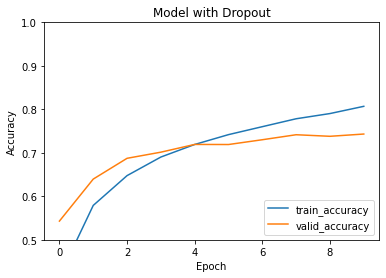

In [35]:
plt.plot(history6.history['accuracy'], label = 'train_accuracy')
plt.plot(history6.history['val_accuracy'], label = 'valid_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.title('Model with Dropout')
plt.legend(loc = 'lower right')

valid_loss, valid_acc = model6.evaluate(valid_images, valid_labels,verbose =2)
print ("valid_accuracy=%s, valid_loss=%s" % (valid_acc, valid_loss))

### Batch Normalization

In [38]:
from tensorflow.keras.layers import BatchNormalization

In [39]:
BatchNormalization(
    axis = -1,
    momentum=0.99,
    epsilon=0.001,
    center=True,
    scale=True,
    beta_initializer="zeros",
    gamma_initializer="ones",
    moving_mean_initializer="zeros",
    moving_variance_initializer="ones",
    beta_regularizer=None,
    gamma_regularizer=None,
    beta_constraint=None,
    gamma_constraint=None,
    renorm=False,
    renorm_clipping=None,
    renorm_momentum=0.99,
    fused=None,
    trainable=True,
    virtual_batch_size=None,
    adjustment=None,
    name=None
   
)

In [40]:
model7 = models.Sequential()
model7.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (32, 32,3)))
model7.add(BatchNormalization())
model7.add(layers.Conv2D(32,(3,3), activation = 'relu'))
model7.add(layers.MaxPooling2D((2,2), strides = 2))
model7.add(layers.Dropout(0.5))
model7.add(layers.Conv2D(256,(5,5), activation = 'relu'))
model7.add(layers.Conv2D(256,(5,5), activation = 'relu'))
model7.add(layers.Dropout(0.25))
model7.add(layers.Flatten())
model7.add(layers.Dense(256, activation = 'relu'))
model7.add(layers.Dense(10, activation = 'softmax'))
model7.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics = ['accuracy'])
model7.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 10, 10, 256)       205056    
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 6, 6, 256)        

In [41]:
history7 = model7.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels)) 

Epoch 1/10
1250/1250 [==============================] - 236s 189ms/step - loss: 1.6216 - accuracy: 0.4040 - val_loss: 1.3568 - val_accuracy: 0.5112
Epoch 2/10
1250/1250 [==============================] - 245s 196ms/step - loss: 1.2723 - accuracy: 0.5443 - val_loss: 1.2779 - val_accuracy: 0.5497
Epoch 3/10
1250/1250 [==============================] - 242s 194ms/step - loss: 1.1118 - accuracy: 0.6061 - val_loss: 1.6069 - val_accuracy: 0.4670
Epoch 4/10
1250/1250 [==============================] - 636s 509ms/step - loss: 1.0179 - accuracy: 0.6400 - val_loss: 1.0495 - val_accuracy: 0.6309
Epoch 5/10
1250/1250 [==============================] - 584s 467ms/step - loss: 0.9413 - accuracy: 0.6661 - val_loss: 1.0014 - val_accuracy: 0.6412
Epoch 6/10
1250/1250 [==============================] - 502s 402ms/step - loss: 0.8813 - accuracy: 0.6896 - val_loss: 1.0073 - val_accuracy: 0.6582
Epoch 7/10
1250/1250 [==============================] - 522s 418ms/step - loss: 0.8262 - accuracy: 0.7086 - val_

313/313 - 14s - loss: 0.9375 - accuracy: 0.6722
valid_accuracy=0.6722000241279602, valid_loss=0.9375156164169312


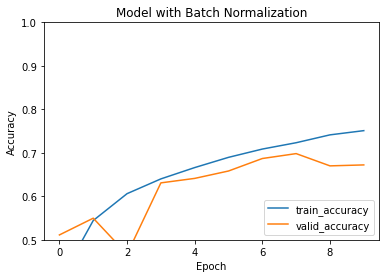

In [42]:
plt.plot(history7.history['accuracy'], label = 'train_accuracy')
plt.plot(history7.history['val_accuracy'], label = 'valid_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.title('Model with Batch Normalization')
plt.legend(loc = 'lower right')

valid_loss, valid_acc = model7.evaluate(valid_images, valid_labels,verbose =2)
print ("valid_accuracy=%s, valid_loss=%s" % (valid_acc, valid_loss))

### Change size of dropouts to 30% (Not the best)

In [43]:
# Maybe reducing the dropout value would work better 

model8 = models.Sequential()
model8.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (32, 32,3)))
model8.add(layers.Conv2D(32,(3,3), activation = 'relu'))
model8.add(layers.MaxPooling2D((2,2), strides = 2))
model8.add(layers.Dropout(0.3))
model8.add(layers.Conv2D(256,(5,5), activation = 'relu'))
model8.add(layers.Conv2D(256,(5,5), activation = 'relu'))
model8.add(layers.Dropout(0.3))
model8.add(layers.Flatten())
model8.add(layers.Dense(256, activation = 'relu'))
model8.add(layers.Dense(10, activation = 'softmax'))
model8.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics = ['accuracy'])
model8.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 10, 10, 256)       205056    
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 6, 6, 256)         1638656   
_________________________________________________________________
dropout_4 (Dropout)          (None, 6, 6, 256)        

In [44]:
history8 = model8.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels)) 

Epoch 1/10
1250/1250 [==============================] - 396s 317ms/step - loss: 1.5447 - accuracy: 0.4295 - val_loss: 1.2280 - val_accuracy: 0.5523
Epoch 2/10
1250/1250 [==============================] - 410s 328ms/step - loss: 1.1025 - accuracy: 0.6089 - val_loss: 0.9558 - val_accuracy: 0.6626
Epoch 3/10
1250/1250 [==============================] - 423s 338ms/step - loss: 0.9279 - accuracy: 0.6709 - val_loss: 0.8580 - val_accuracy: 0.7030
Epoch 4/10
1250/1250 [==============================] - 422s 338ms/step - loss: 0.8267 - accuracy: 0.7075 - val_loss: 0.8061 - val_accuracy: 0.7175
Epoch 5/10
1250/1250 [==============================] - 423s 339ms/step - loss: 0.7481 - accuracy: 0.7372 - val_loss: 0.8267 - val_accuracy: 0.7208
Epoch 6/10
1250/1250 [==============================] - 408s 326ms/step - loss: 0.6943 - accuracy: 0.7559 - val_loss: 0.8702 - val_accuracy: 0.7098
Epoch 7/10
1250/1250 [==============================] - 391s 313ms/step - loss: 0.6380 - accuracy: 0.7743 - val_

313/313 - 14s - loss: 0.8305 - accuracy: 0.7346
valid_accuracy=0.7346000075340271, valid_loss=0.8304747343063354


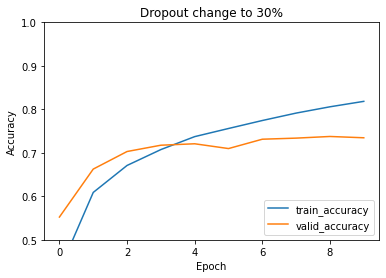

In [45]:
plt.plot(history8.history['accuracy'], label = 'train_accuracy')
plt.plot(history8.history['val_accuracy'], label = 'valid_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.title('Dropout change to 30%')
plt.legend(loc = 'lower right')

valid_loss, valid_acc = model8.evaluate(valid_images, valid_labels,verbose =2)
print ("valid_accuracy=%s, valid_loss=%s" % (valid_acc, valid_loss))

Save the model. Follow the ID number with the predicted values (10 of them) for each class. 

In [79]:
#saving the model for kaggle submission

import pandas as pd
best_model = model6.predict(test_images)
#id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
df = pd.DataFrame(best_model, columns = ['cat0','cat1','cat2','cat3','cat4',
                                         'cat5','cat6','cat7','cat8','cat9'])
df.index.name = 'id'
df.index += 1

In [80]:
df.sample(5)

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
id,,,,,,,,,,
732,0.154104,2.538299e-03,0.832909,0.000002,6.997659e-08,0.000071,2.321910e-06,0.000273,9.869157e-03,2.305678e-04
1210,0.000883,2.817674e-06,0.001306,0.005332,2.882666e-02,0.009394,2.044620e-04,0.953738,4.469536e-05,2.676494e-04
8822,0.000003,3.652824e-12,0.000002,0.000005,1.016712e-03,0.000942,9.526818e-09,0.998031,2.990061e-08,1.230247e-09
7790,0.000119,2.351999e-04,0.001977,0.556619,1.225388e-02,0.093587,1.253991e-03,0.330716,3.000484e-03,2.393452e-04
7146,0.000018,2.275464e-03,0.001881,0.135924,4.860027e-04,0.850182,1.113622e-03,0.005572,1.464534e-03,1.083644e-03


In [50]:
df.shape

(10000, 10)

In [81]:
df.to_csv('best_model.csv',header = True)

## The Best Model
### Customized Model (log loss on test set achieved 0.52)

Convolution layer ==> Pooling layer ==> Flattening layer ==> Dense/Output layer

In [62]:
# 6 Conv layers 3 pooling layers
#6 batch normalization
# 3 different dropout values
#activation function elu
#note padding is the 'same' so that the output volume size matches the input volume size

model_c = models.Sequential()
model_c.add(layers.Conv2D(32, (3,3), padding='same',activation = 'elu',input_shape=(32, 32,3)))
model_c.add(layers.BatchNormalization())
model_c.add(layers.Conv2D(32, (3,3), padding='same',activation = 'elu'))
model_c.add(layers.BatchNormalization())
model_c.add(layers.MaxPooling2D(pool_size=(2,2)))
model_c.add(layers.Dropout(0.2))
model_c.add(layers.Conv2D(64, (3,3), padding='same', activation = 'elu'))
model_c.add(layers.BatchNormalization())
model_c.add(layers.Conv2D(64, (3,3), padding='same', activation = 'relu'))
model_c.add(layers.BatchNormalization())
model_c.add(layers.MaxPooling2D(pool_size=(2,2)))
model_c.add(layers.Dropout(0.3))
model_c.add(layers.Conv2D(128, (3,3), padding='same',activation = 'elu'))
model_c.add(layers.BatchNormalization())
model_c.add(layers.Conv2D(128, (3,3), padding='same',activation = 'elu'))
model_c.add(layers.BatchNormalization())
model_c.add(layers.MaxPooling2D(pool_size=(2,2)))
model_c.add(layers.Dropout(0.4)) 
model_c.add(layers.Flatten())
model_c.add(layers.Dense(10, activation='softmax'))

model_c.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics = ['accuracy'])
model_c.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_26 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_27 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 16, 16, 64)      

In [63]:
history_c = model_c.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels)) 

Epoch 1/10
1250/1250 [==============================] - 349s 279ms/step - loss: 1.7324 - accuracy: 0.4559 - val_loss: 1.1463 - val_accuracy: 0.6062
Epoch 2/10
1250/1250 [==============================] - 313s 251ms/step - loss: 1.0723 - accuracy: 0.6353 - val_loss: 0.9341 - val_accuracy: 0.6793
Epoch 3/10
1250/1250 [==============================] - 224s 179ms/step - loss: 0.8734 - accuracy: 0.6971 - val_loss: 0.8629 - val_accuracy: 0.7090
Epoch 4/10
1250/1250 [==============================] - 230s 184ms/step - loss: 0.7589 - accuracy: 0.7350 - val_loss: 0.7361 - val_accuracy: 0.7499
Epoch 5/10
1250/1250 [==============================] - 238s 190ms/step - loss: 0.6767 - accuracy: 0.7624 - val_loss: 0.6922 - val_accuracy: 0.7657
Epoch 6/10
1250/1250 [==============================] - 245s 196ms/step - loss: 0.6149 - accuracy: 0.7865 - val_loss: 0.6219 - val_accuracy: 0.7867
Epoch 7/10
1250/1250 [==============================] - 244s 195ms/step - loss: 0.5633 - accuracy: 0.8031 - val_

313/313 - 7s - loss: 0.5376 - accuracy: 0.8172
valid_accuracy=0.8172000050544739, valid_loss=0.5375774502754211


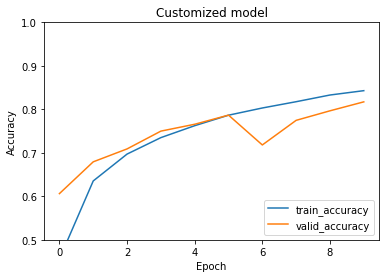

In [64]:
plt.plot(history_c.history['accuracy'], label = 'train_accuracy')
plt.plot(history_c.history['val_accuracy'], label = 'valid_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.title('Customized model')
plt.legend(loc = 'lower right')

valid_loss, valid_acc = model_c.evaluate(valid_images, valid_labels,verbose =2)
print ("valid_accuracy=%s, valid_loss=%s" % (valid_acc, valid_loss))

In [71]:
custom_model1 = model_c.predict(test_images)
#id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
df_1 = pd.DataFrame(custom_model1, columns = ['cat0','cat1','cat2','cat3','cat4',
                                         'cat5','cat6','cat7','cat8','cat9'])
df_1.index.name = 'id'
df_1.index += 1

In [72]:
df_1.shape

(10000, 10)

In [73]:
#loss on test 0.52
df_1.to_csv('customized_model1.csv',header = True)

### Appears to be custom model's score improved. We will add regularization

In [76]:
#only L2 regularization added and optimizer changed to RMSPROP from adam

model_c1 = models.Sequential()
model_c1.add(layers.Conv2D(32, (3,3), padding='same',kernel_regularizer=tf.keras.regu larizers.l2(1e-4),activation = 'elu',input_shape=(32, 32,3)))
model_c1.add(layers.BatchNormalization())
model_c1.add(layers.Conv2D(32, (3,3), padding='same',kernel_regularizer=tf.keras.regularizers.l2(1e-4),activation = 'elu'))
model_c1.add(layers.BatchNormalization())
model_c1.add(layers.MaxPooling2D(pool_size=(2,2)))
model_c1.add(layers.Dropout(0.2))
model_c1.add(layers.Conv2D(64, (3,3), padding='same',kernel_regularizer=tf.keras.regularizers.l2(1e-4), activation = 'elu'))
model_c1.add(layers.BatchNormalization())
model_c1.add(layers.Conv2D(64, (3,3), padding='same',kernel_regularizer=tf.keras.regularizers.l2(1e-4), activation = 'elu'))
model_c1.add(layers.BatchNormalization())
model_c1.add(layers.MaxPooling2D(pool_size=(2,2)))
model_c1.add(layers.Dropout(0.3))
model_c1.add(layers.Conv2D(128, (3,3), padding='same',kernel_regularizer=tf.keras.regularizers.l2(1e-4),activation = 'elu'))
model_c1.add(layers.BatchNormalization())
model_c1.add(layers.Conv2D(128, (3,3), padding='same',kernel_regularizer=tf.keras.regularizers.l2(1e-4),activation = 'elu'))
model_c1.add(layers.BatchNormalization())
model_c1.add(layers.MaxPooling2D(pool_size=(2,2)))
model_c1.add(layers.Dropout(0.4)) 
model_c1.add(layers.Flatten())
model_c1.add(layers.Dense(10, activation='softmax'))

model_c1.compile(optimizer = tf.keras.optimizers.rmsprop(lr=0.001,decay=1e-6), 
                 loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics = ['accuracy'])
model_c1.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_38 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_39 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 16, 16, 64)      

In [77]:
history_c1 = model_c1.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels)) 

Epoch 1/10
1250/1250 [==============================] - 205s 164ms/step - loss: 1.7647 - accuracy: 0.4782 - val_loss: 1.1803 - val_accuracy: 0.6367
Epoch 2/10
1250/1250 [==============================] - 246s 197ms/step - loss: 1.1283 - accuracy: 0.6463 - val_loss: 0.9401 - val_accuracy: 0.7044
Epoch 3/10
1250/1250 [==============================] - 247s 197ms/step - loss: 0.9482 - accuracy: 0.7056 - val_loss: 0.9253 - val_accuracy: 0.7101
Epoch 4/10
1250/1250 [==============================] - 246s 197ms/step - loss: 0.8501 - accuracy: 0.7431 - val_loss: 0.7985 - val_accuracy: 0.7580
Epoch 5/10
1250/1250 [==============================] - 238s 190ms/step - loss: 0.7841 - accuracy: 0.7688 - val_loss: 0.7702 - val_accuracy: 0.7754
Epoch 6/10
1250/1250 [==============================] - 243s 194ms/step - loss: 0.7398 - accuracy: 0.7883 - val_loss: 0.7497 - val_accuracy: 0.7922
Epoch 7/10
1250/1250 [==============================] - 246s 197ms/step - loss: 0.7025 - accuracy: 0.8033 - val_

313/313 - 7s - loss: 0.7502 - accuracy: 0.8050
valid_accuracy=0.8050000071525574, valid_loss=0.7501996159553528


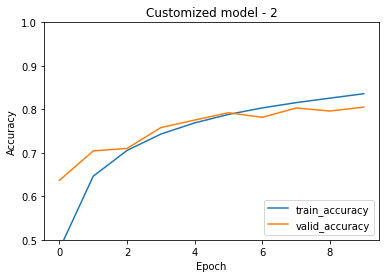

In [78]:
plt.plot(history_c1.history['accuracy'], label = 'train_accuracy')
plt.plot(history_c1.history['val_accuracy'], label = 'valid_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.title('Customized model - 2')
plt.legend(loc = 'lower right')

valid_loss, valid_acc = model_c1.evaluate(valid_images, valid_labels,verbose =2)
print ("valid_accuracy=%s, valid_loss=%s" % (valid_acc, valid_loss))

In [82]:
custom_model2 = model_c1.predict(test_images)
#id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
df_2 = pd.DataFrame(custom_model2, columns = ['cat0','cat1','cat2','cat3','cat4',
                                         'cat5','cat6','cat7','cat8','cat9'])
df_2.index.name = 'id'
df_2.index += 1

In [83]:
#loss on test 0.57
df_2.to_csv('custom_model2.csv', header = True)